In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime
import seaborn as sns

sns.set_style('darkgrid')
sensor_labels = ['3.3V 10A', '12V 10A', 'Ext 12V 20A', 'USB-C 20V 5A']
line_color = ['b', 'r', 'k', 'k']

## Long term measurement

In [9]:
def plot_power_over_time(sensor, fig, ax):
    #no_load = [i for i,x in enumerate(i_set) if x==0][0] 
    pwr_err = [powers[i] -np.mean(powers) for i in range(len(powers))]
    min_err = [pwr_min[i] -np.mean(powers) for i in range(len(powers))]
    max_err = [pwr_max[i] -np.mean(powers) for i in range(len(powers))]
    #err_min = [expt_power[cnt] - pwr_min[cnt]  for cnt in range(len(i_set))]
    #err_max = [expt_power[cnt] - pwr_max[cnt]  for cnt in range(len(i_set))]
    #err_pwr = [expt_power[cnt] - powers[cnt] for cnt in range(len(i_set))]
    xas = [ (time_scale[cnt]-time_scale[0])/(60*60) for cnt in range(len(time_scale))]
    ax.plot(xas, min_err, linestyle='dashed',  c=line_color[sensor])
    ax.plot(xas, pwr_err, label=f"{sensor_labels[sensor]} AVG ", c=line_color[sensor])
    ax.plot(xas, max_err, linestyle='dashed', label=f"{sensor_labels[sensor]} peak ", c=line_color[sensor])
    ax.set(xlabel="Time (Hour)", ylabel="Power error (W)",
           title="Power error over time.")
    ax.grid(True)
    ax.legend(loc="upper right")
    stri = f"Sensor: {sensor_labels[sensor]}; "
    stri += f"min-max power_AVG +/- {((np.max(pwr_err)-np.min(pwr_err))/2):4.3f}W; "
    stri += f"min-max power_delta +/- {np.max(np.abs([max_err, min_err])):4.3f}W"
    print(stri) 

In [3]:
def read_datafile(file_name):
    with open(file_name, newline='') as csvfile:
        data = []
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            data.append(row)
    data = np.array(data[1:])
    volt = [float(dat) for dat in data.transpose()[4+1+sensor*3].flatten()]
    current = [float(dat) for dat in data.transpose()[4+sensor*3].flatten()]
    power = [volt[cnt]*current[cnt] for cnt in range(len(volt))]
    time = [float(dat) for dat in data.transpose()[1].flatten()]
    dtime = [float(dat) for dat in data.transpose()[2].flatten()]
    return volt, current, power, time, dtime

In [7]:
#file_location = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/5A_24hours/'
file_location = 'D:/GIT/powersensor3/Measurements/Sweeps/long_term/'
#file_location = 'M:/VIEWlogic/Projects/PowerSensor/Measurements/long_term/'
files = os.listdir(file_location)
sensor = 2 # 12V 7.5 A
#sensor = 0 # 3V3 5 A
sensors = [2] #0, 2]
print(files)
#file_name = 'D:/Users/Schoonderbeek/Downloads/PowerSensor3_sweeps/S1_5V_1A.txt'

fig, ax = plt.subplots()
for sensor in sensors:
    voltages=[]
    currents=[]
    cur_max=[]
    cur_min=[]
    volt_max=[]
    volt_min=[]
    time_scale=[]
    powers=[]
    pwr_max=[]
    pwr_min=[]
    for file_name in files:
        current=[]
        file_name = file_location + file_name
        file_time = os.path.getmtime(file_name)
        time_scale.append(os.path.getmtime(file_name))
        volt, current, power, time, dtime = read_datafile(file_name)
        voltages.append(np.mean(volt))
        volt_max.append(np.max(volt))
        volt_min.append(np.min(volt))
        currents.append(np.mean(current))
        cur_max.append(np.max(current))
        cur_min.append(np.min(current))
        powers.append(np.mean(power))
        pwr_max.append(np.max(power))
        pwr_min.append(np.min(power))

    order = np.argsort(time_scale)
    print(order)
    currents = [ currents[this] for this in order]
    voltages = [ voltages[this] for this in order]
    cur_max = [ cur_max[this] for this in order]
    cur_min = [ cur_min[this] for this in order]
    volt_max = [ volt_max[this] for this in order]
    volt_min = [ volt_min[this] for this in order]
    powers = [ powers[this] for this in order]
    pwr_max = [ pwr_max[this] for this in order]
    pwr_min = [ pwr_min[this] for this in order]

    time_scale = [time_scale[this] for this in order]
    plot_power_over_time(sensor, fig, ax)
fig.savefig("longterm_1.pdf")
fig.show()

['PCIe_set2_lt_1.csv', 'PCIe_set2_lt_10.csv', 'PCIe_set2_lt_100.csv', 'PCIe_set2_lt_101.csv', 'PCIe_set2_lt_102.csv', 'PCIe_set2_lt_103.csv', 'PCIe_set2_lt_104.csv', 'PCIe_set2_lt_105.csv', 'PCIe_set2_lt_106.csv', 'PCIe_set2_lt_107.csv', 'PCIe_set2_lt_108.csv', 'PCIe_set2_lt_109.csv', 'PCIe_set2_lt_11.csv', 'PCIe_set2_lt_110.csv', 'PCIe_set2_lt_111.csv', 'PCIe_set2_lt_112.csv', 'PCIe_set2_lt_113.csv', 'PCIe_set2_lt_114.csv', 'PCIe_set2_lt_115.csv', 'PCIe_set2_lt_116.csv', 'PCIe_set2_lt_117.csv', 'PCIe_set2_lt_118.csv', 'PCIe_set2_lt_119.csv', 'PCIe_set2_lt_12.csv', 'PCIe_set2_lt_120.csv', 'PCIe_set2_lt_121.csv', 'PCIe_set2_lt_122.csv', 'PCIe_set2_lt_123.csv', 'PCIe_set2_lt_124.csv', 'PCIe_set2_lt_125.csv', 'PCIe_set2_lt_126.csv', 'PCIe_set2_lt_127.csv', 'PCIe_set2_lt_128.csv', 'PCIe_set2_lt_129.csv', 'PCIe_set2_lt_13.csv', 'PCIe_set2_lt_130.csv', 'PCIe_set2_lt_131.csv', 'PCIe_set2_lt_132.csv', 'PCIe_set2_lt_133.csv', 'PCIe_set2_lt_134.csv', 'PCIe_set2_lt_135.csv', 'PCIe_set2_lt_136.csv

C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_45264\2228688391.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Sensor: Ext 12V 20A; min-max power_AVG +/- 0.087W; min-max power_delta +/- 4.990W


C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_45264\1201712657.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


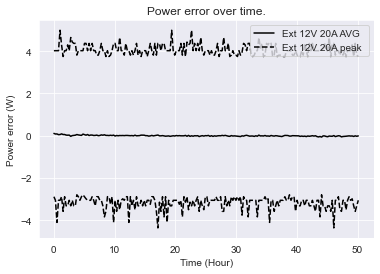

In [15]:
fig, ax = plt.subplots()
plot_power_over_time(sensor, fig, ax)
fig.savefig("longterm_1.pdf")
fig.show()

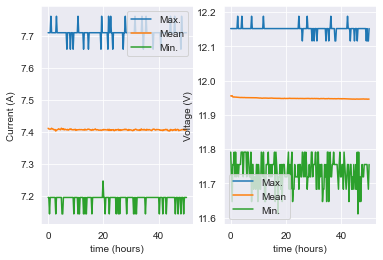

In [5]:
#xas = [(time_scale[cnt]-numpy.min(time_scale)) for cnt in range(len(time_scale))]
xas= [ (time_scale[cnt]-time_scale[0])/(60*60) for cnt in range(len(time_scale))]
plt.figure(2)
plt.title(f"Current over time Sensor nr: {sensor}")
plt.subplot(121)
plt.plot(xas, cur_max, label='Max.')
plt.plot(xas, currents, label='Mean')
plt.plot(xas, cur_min, label='Min.')
plt.legend()
plt.xlabel("time (hours)")
plt.ylabel("Current (A)")
#plt.ylim([4.5,5.5])
plt.grid(True)

plt.subplot(122)
plt.plot(xas, volt_max, label='Max.')
plt.plot(xas, voltages, label='Mean')
plt.plot(xas, volt_min, label='Min.')
plt.legend()
plt.xlabel("time (hours)")
plt.ylabel("Voltage (V)")
#plt.ylim([4.5,5.5])
plt.grid(True)


#plt.savefig("longterm.pdf")
plt.show()

C:\Users\Schoonderbeek\AppData\Local\Temp\ipykernel_59980\1468086143.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


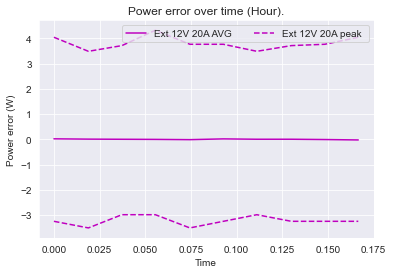

In [60]:
fig, ax = plt.subplots()
plot_power_over_time(sensor, fig, ax)
fig.savefig("longterm.pdf")
fig.show()

In [55]:
stri = f"Sensor: {sensor_labels[sensor]}; "
stri += f"min-max power_AVG +/- {((np.max(pwr_err)-np.min(pwr_err))/2):4.3f}W; "
stri += f"min-max power_delta +/- {np.max(np.abs([max_err, min_err])):4.3f}W"
print(stri) 

Sensor: Ext 12V 20A; min-max power_AVG +/- 0.022W; min-max power_delta +/- 4.320W
